# Pretrained HOG Detector

In [26]:
import json
import os
import cv2
import numpy as np
import argparse
import ipdb
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from imutils.object_detection import non_max_suppression

In [40]:
def do_NMS(bboxes, scores, overlapThresh):
    # changes x,y,w,h to x,y,x2,y2
    for idx in range(bboxes.shape[0]):
        bboxes[idx, 2] += bboxes[idx, 0]
        bboxes[idx, 3] += bboxes[idx, 1]
    
    bboxes_nms = non_max_suppression(bboxes, probs=scores.reshape(-1), overlapThresh=overlapThresh)
    
    # get scores for these bounding boxes
    scores_nms = []
    for bb in bboxes_nms:
        scores_nms.append(scores[(bb == bboxes).mean(axis=1) == 1][0])
    scores_nms = np.array(scores_nms).reshape(-1)

    # changes x,y,x2,y2 to x,y,w,h
    for idx in range(bboxes_nms.shape[0]):
        bboxes_nms[idx, 2] = bboxes_nms[idx, 2] - bboxes_nms[idx, 0] 
        bboxes_nms[idx, 3] = bboxes_nms[idx, 3] - bboxes_nms[idx, 1] 

    return bboxes_nms, scores_nms

In [41]:
test_json = json.loads(open("PennFudanPed_val.json",'r').read())
img_dicts = test_json['images']

In [42]:
annotations = test_json['annotations'] # this is ONLY used for comparison of predicted bboxes
annotations = pd.json_normalize(annotations)

In [43]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(hog.getDefaultPeopleDetector())

In [44]:
img_dict = img_dicts[0]
img_dict

{'file_name': 'PennFudanPed/PNGImages/PennPed00046.png',
 'height': 348,
 'width': 534,
 'id': 0}

In [45]:
img = cv2.imread(os.path.join("./", img_dict['file_name']))

In [46]:
img.shape

(348, 534, 3)

In [47]:
bboxes, scores = hog.detectMultiScale(img) # , winStride=(2, 2), padding=(10, 10), scale=1.02)

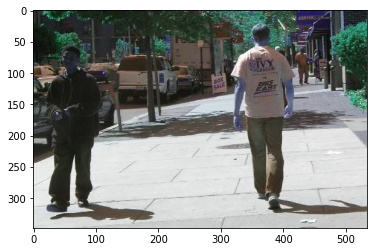

In [48]:
plt.imshow(img)

In [49]:
print(bboxes)
print(scores)

[[151  23  93 187]
 [288  29 155 308]]
[[0.50648117]
 [1.23230827]]


In [50]:
list(annotations.loc[annotations['image_id'] == img_dict['id']]['bbox'])

[[20.0, 57.0, 90.0, 265.0],
 [317.0, 21.0, 102.0, 297.0],
 [420.0, 61.0, 20.0, 57.0]]

In [51]:
bboxes, scores = do_NMS(bboxes, scores, overlapThresh=0.8) # bboxes.dtype is int, scores.dtype is float

In [52]:
print(bboxes)
print(scores)

[[288  29 155 308]
 [151  23  93 187]]
[1.23230827 0.50648117]
